#***AutoEncoders***
AutoEncoder is an ***unsupervised Artificial Neural Network*** that attempts to encode the data by compressing it into a lower dimension (*bottleneck layer*), and than decoding the data to reconstruct the original input.

In AutoEncoders is important that the number of input must be equal to the numner of output.

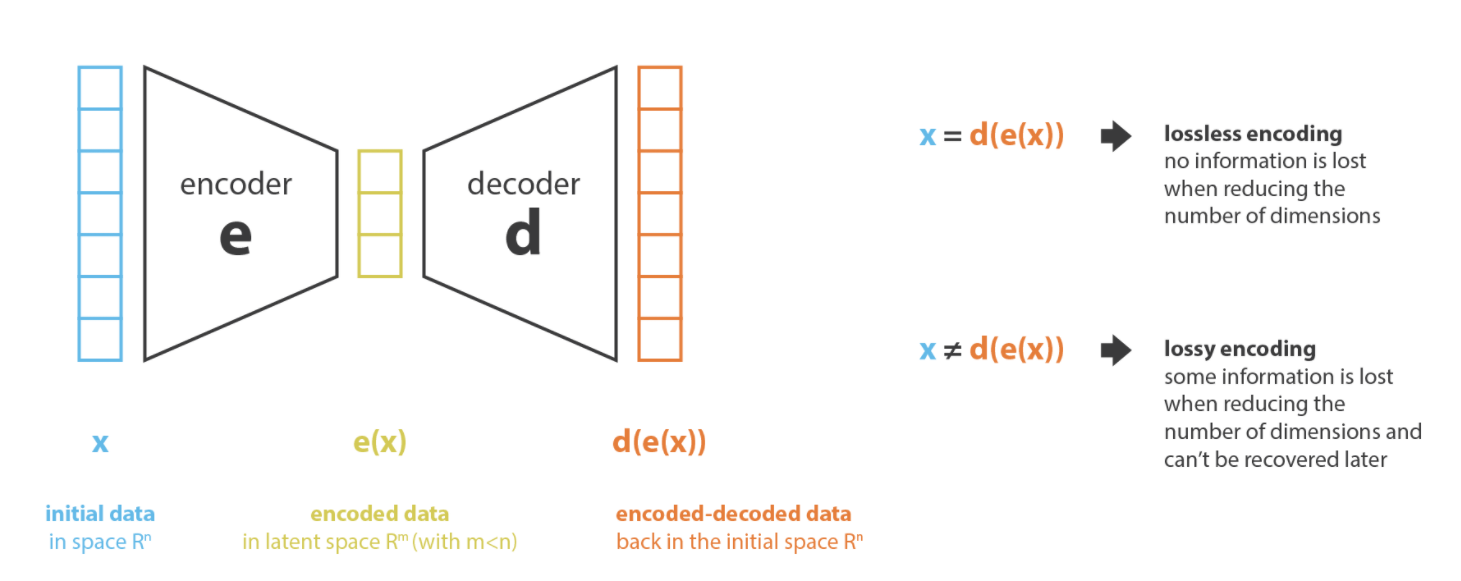

- ***Encoder***: function $e$ that compresses the input into a *latent-space* representation. $e(x)$
- ***Decoder***: function $d$ that reconstruct the input from the *latent-space* representation. $d(e(x))$


Dimensionality reduction can then be interpreted as data compression where the encoder compress the data (from the initial space to the *encoded space*, also called *latent space*) whereas the decoder decompress them.

***Dimensionality reduction***

Dimensionality reduction is the process of reducing the number of features that describe some data. This reduction is done either by selection (only some existing features are conserved) or by extraction (a reduced number of new features are created based on the old features) and can be useful in many situations that require low dimensional data (data visualisation, data storage, heavy computation…)

So we are looking for the pair of encoder/decoder that keeps the ***maximum of information when encoding*** and, so, has the ***minimum of reconstruction error when decoding***.

Dimensionality reduction with no reconstruction loss often comes with a price: the lack of interpretable and exploitable structures in the latent space (***lack of regularity***). Second, most of the time the final purpose of dimensionality reduction is not to only reduce the number of dimensions of the data but to reduce this number of dimensions **while keeping the major part of the data structure information in the reduced representations**. For these two reasons, the dimension of the latent space and the “depth” of autoencoders (that define degree and quality of compression) have to be carefully controlled and adjusted depending on the final purpose of the dimensionality reduction.

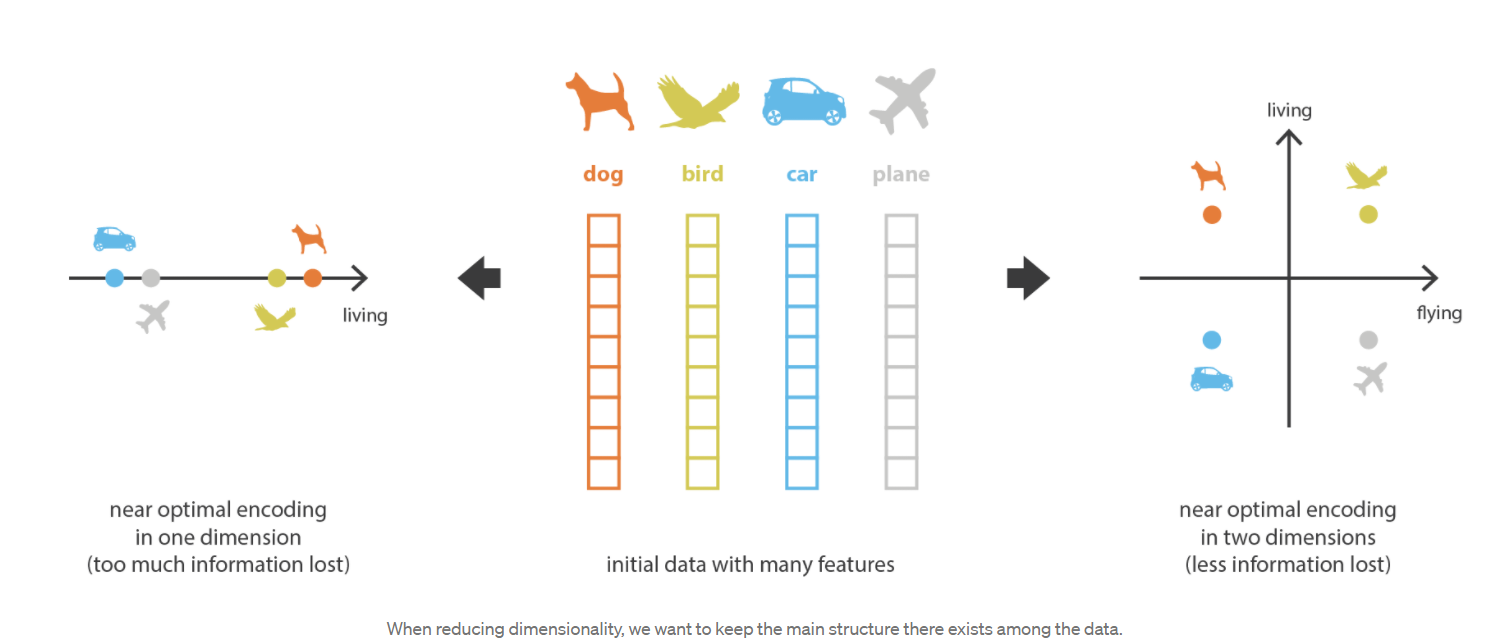

##**Variational Autoencoders VAE**
Up to now, we have discussed dimensionality reduction problem and introduce autoencoders that are encoder-decoder architectures that can be trained by gradient descent.


###***Limitations of autoencoders for content generation***
Once the autoencoder has been trained, we have both an encoder and a decoder but still no real way to produce any new content. We could be tempted to think that, if the latent space is regular enough (well “organized” by the encoder during the training process), we could take a point randomly from that latent space and decode it to get a new content.

However, the regularity of the latent space for autoencoders is a difficult point that depends on the ***lack of regularity***. The high degree of freedom of the autoencoder that makes possible to encode and decode with no information loss (despite the low dimensionality of the latent space) leads to a ***severe overfitting***.

***The autoencoder is solely trained to encode and decode with as few loss as possible, no matter how the latent space is organised.***


###***Definition of variational autoencoders***
One possible solution to obtain such regularity is to introduce explicit regularisation during the training process. ***A variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.***

Just as a standard autoencoder, a variational autoencoder is an architecture composed of both an encoder and a decoder and that is trained to minimise the reconstruction error between the encoded-decoded. However, in order to introduce some regularisation of the latent space, we proceed to a slight modification of the encoding-decoding process: ***instead of encoding an input as a single point, we encode it as a distribution over the latent space.***

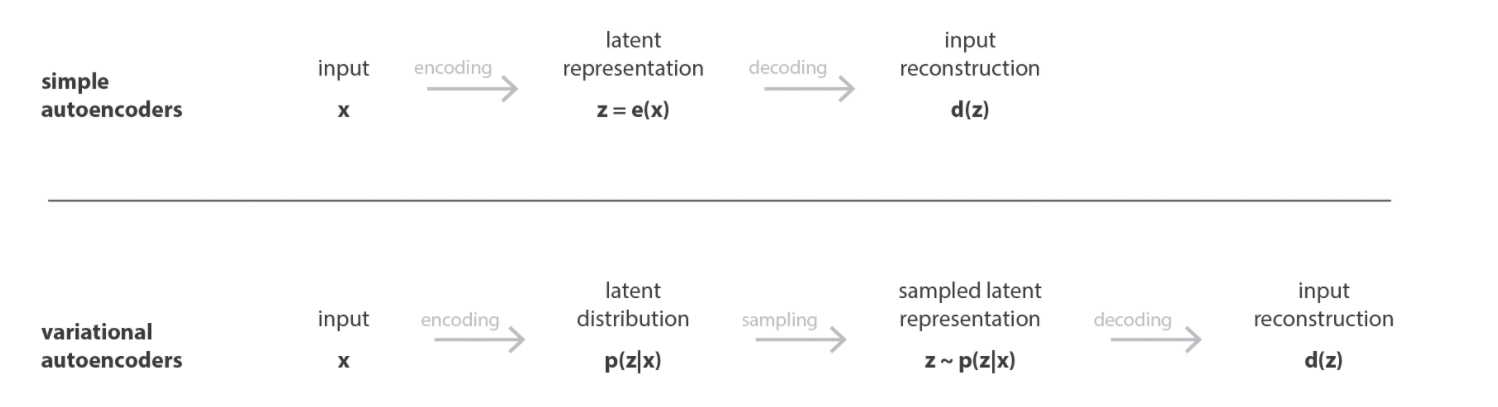

In practice, the encoded distributions are chosen to be normal so that the encoder can be trained to return the mean and the covariance matrix that describe these Gaussians. The reason why an input is encoded as a Gaussian distribution with some variance instead of a single point is that it makes possible to express very naturally the latent space regularisation.



The loss function that is minimised when training a ***VAE*** is composed of a “*reconstruction term*” (on the final layer), that tends to make the encoding-decoding scheme as performant as possible, and a “*regularisation term*” (on the latent layer), that tends to regularise the organisation of the latent space. That regularisation term is expressed as the ***Kulback-Leibler divergence*** between the returned distribution and a standard Gaussian.

\begin{eqnarray}
        \text{Recostruction error: } L_{rec} = \|x-x'\|^2,\\
        \text{Kulback Leibler divergence: } L_{KL}= \sum_{i=1}^k σ_i^2 + μ_i^2-log(σ_i^2)+1 \\
        \text{Loss function: } L_{VAE} = L_{rec} + l_{KL}
    \end{eqnarray}

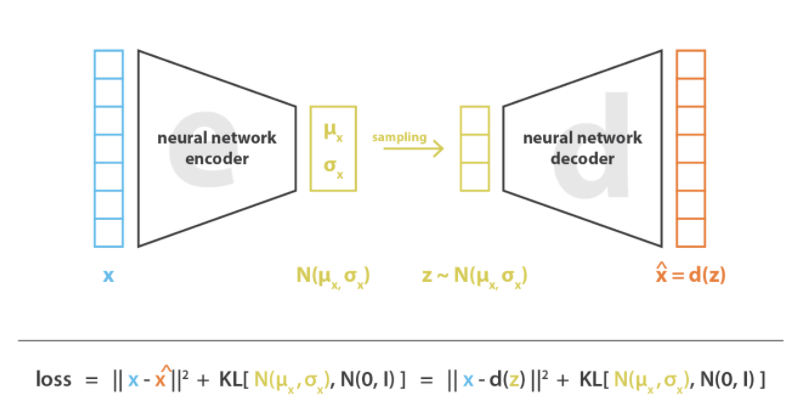

##***Examples***
In the following examples a Deep AutoEncoder is used, where the encoder and the decoder are symmetrical.

- ***Basic AutoEncoder***
- ***Image denoising***

###***Package***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

###***Load the dataset***
We will train the basic autoencoder using the ***Fashon MNIST*** dataset. Each image in this dataset is 28x28 pixels.

In [ ]:
#we will use fashion_mnist dataset on the first and second example
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Normalizing the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###***Basic AutoEncoder***
Define an autoencoder with two Dense layers: an ***encoder***, which compresses the images into a *64 dimensional latent vector*, and a ***decoder***, that reconstructs the original image from the latent space.

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
#we used the Adam optimizer
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using ***x_train*** as both the *input* and the *target*. The ***encoder*** will learn to compress the dataset from *784 dimensions to the latent space*, and the ***decoder*** will learn to reconstruct the original images. 

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0239 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

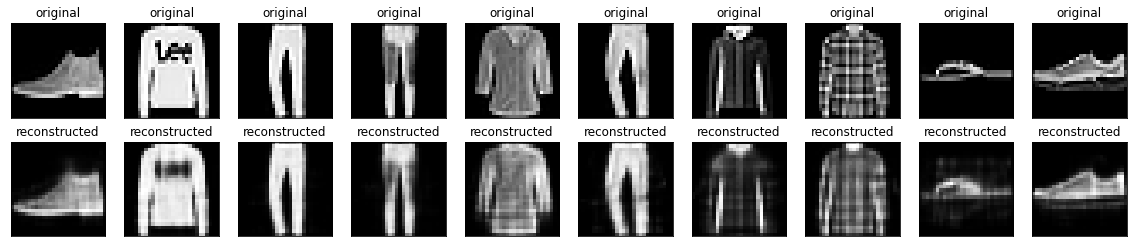

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

###***Image denoising***
An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

In [ ]:
#Adding a new column for the ramdom noise
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#Adding random noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

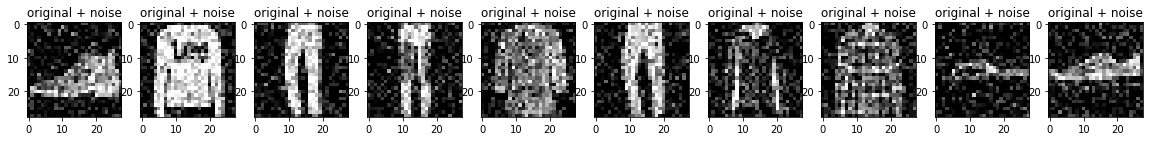

In [ ]:
#plotting the noisy image
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

####***Define a convolutional autoencoder***
We will train a convolutional autoencoder using ***Conv2D*** ***layers in the encoder***, and ***Conv2DTranspose*** ***layers in the decoder***.

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
#Adam optimization
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.0196 - val_loss: 0.0105
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
#the images are downsampled from 28x28 to 7x7.
print(autoencoder.encoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#the images back from 7x7 to 28x28.
print(autoencoder.decoder.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

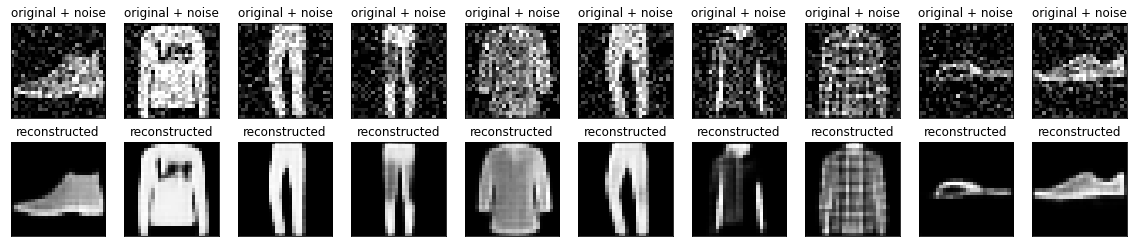

In [ ]:
#Plotting both the noisy images and the denoised images 
#produced by the autoencoder.
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

#***References***

[`Semantic Hashing,
Ruslan Salakhutdinov, Geoffrey Hinton`](http://www.utstat.toronto.edu/~rsalakhu/papers/semantic_final.pdf)

[`Intro to Autoencoders in TensorFlow`](https://www.tensorflow.org/tutorials/generative/autoencoder)

[`Understanding Variational Autoencoders (VAEs)`](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)
